## Task 2 - To Explore Supervised Machine Learning 
- ### In this regression task we will predict the percentage of marks that a student is expected to score  based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.
- ### What will be predicted score if a student study for 9.25hrs in a day.

In [1]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for visual representation of model output
from sklearn.linear_model import LinearRegression #for training the model and making prediction using Linear Regression
from sklearn.model_selection import train_test_split #to split the data as train and test data sets

### UNDERSTANDING DATASET
- ### The data contains number of hours studied and percentage of marks obatained by 25 students.

In [2]:
#Read Dataset from the given url

data_url = "http://bit.ly/w-data"
marks_data=pd.read_csv(data_url)

In [3]:
marks_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
marks_data.shape

(25, 2)

### DATA PREPARATION & SPLITTING
- ### 'Hours' is the independent variable (X) using which we can determine the dependent variable 'Scores' (Y)

In [5]:
X=marks_data.iloc[:, :-1].values 
Y=marks_data.iloc[:, 1].values  

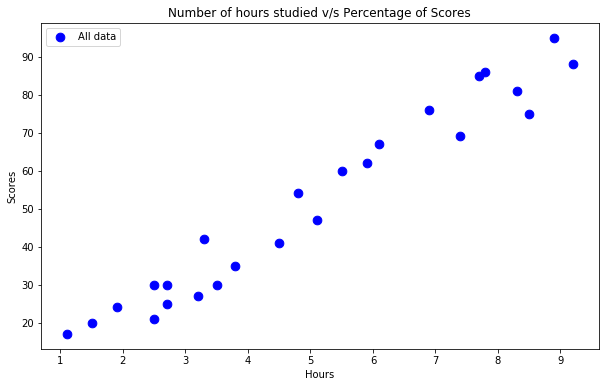

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(X,Y,color='blue',s=75,label='All data')
plt.title('Number of hours studied v/s Percentage of Scores')
plt.xlabel('Hours')
plt.ylabel("Scores")
plt.legend()
plt.show() 

### A Positive Linear Relationship between Hours and Scores can be observed from the above graph.

In [7]:
# Spliting the dataset in the ratio -> train:test = 80:20 

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

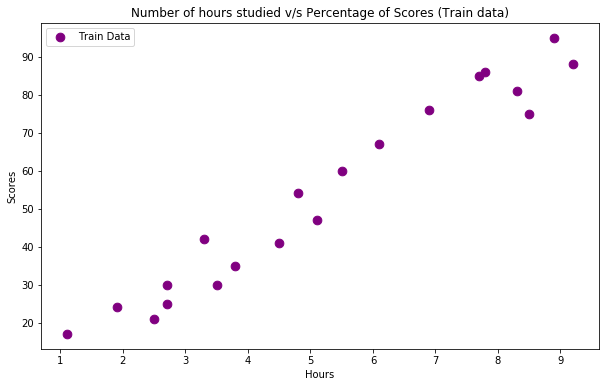

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(x_train,y_train,color='purple',s=75,label='Train Data')
plt.title('Number of hours studied v/s Percentage of Scores (Train data)')
plt.xlabel('Hours')
plt.ylabel("Scores")
plt.legend()
plt.show() 

### MODEL TRAINING & PREDICTION

In [9]:
#Model training using Linear Regression Algorithm

reg=LinearRegression()
reg=reg.fit(x_train,y_train)

#Prediction using test dataset
y_pred=reg.predict(x_test)

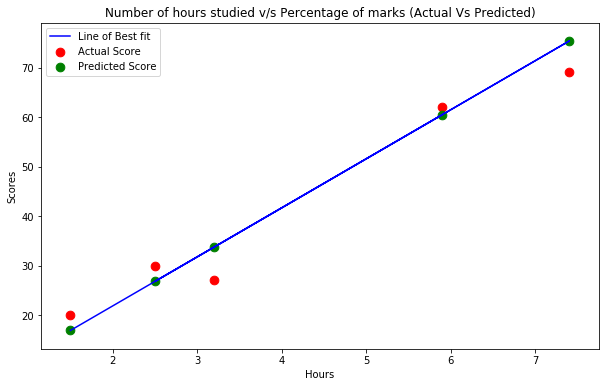

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(x_test,y_test,color='red',s=75,label='Actual Score')
plt.scatter(x_test,y_pred,color='green',s=75,label='Predicted Score')
plt.plot(x_test,y_pred,color='blue',label='Line of Best fit')
plt.title('Number of hours studied v/s Percentage of marks (Actual Vs Predicted)')
plt.xlabel('Hours')
plt.ylabel("Scores")
plt.legend()
plt.show() 

In [11]:
error=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Absolute Error': abs(y_test-y_pred)})
error

,Actual,Predicted,Absolute Error
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


### RMSE & R-squared value 
- ### To study the difference in actual and predicted score of the test dataset, we find out the Root Mean Squared Error(RMSE) & R-squared value.

In [12]:
from sklearn.metrics import r2_score,mean_squared_error

In [13]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE = ",rmse)

RMSE =  4.6474476121003665


In [14]:
r2=r2_score(y_test,y_pred)
print("The regressor score is ", r2)

The regressor score is  0.9454906892105356


### What will be predicted score if a student study for 9.25hrs in a day.

In [15]:
test_Hours=np.array([9.25]).reshape(-1,1)#Creating a numpy array of the test independent variable 'Hours'
pred_Scores=reg.predict(test_Hours)

print('The predicted percentage score of a student studying for 9.25 hours a day is {} %'.format(np.round(pred_Scores[0],2)))

The predicted percentage score of a student studying for 9.25 hours a day is 93.69 %


### INFERENCE
- ### For the given data, R-Square is 94.55% meaning 94.55%  of variance in Score is explained by Number of hours studied. In other words, if we know Number of hours studied by a student,we can have 94.55%  information to make an accurate prediction about his/her score.
- ### The predicted percentage score of a student studying for 9.25 hours a day is 93.69%.